# Análise de Dados do Banco Central do Brasil (BACEN) no Python

Prof. Daniel de Abreu Pereira Uhr

## Conteúdo

* Instalando o pacote python-bcb
* Análise da Base Monetária
* Análise da Selic
* Análise da Taxa de Câmbio


### Instalando o pacote python-bcb

Instalando o pacote no terminal:  `pip install python-bcb `

### Análise da Base Monetária

A base monetária é a quantidade de dinheiro que o Banco Central do Brasil (BACEN) emite. A base monetária é composta por papel moeda em poder do público e reservas bancárias. A base monetária é um dos principais instrumentos de política monetária do BACEN.

Em termos mais técnicos, a base monetária é a soma do papel moeda em poder do público e das reservas bancárias. O papel moeda em poder do público é o dinheiro que as pessoas têm em suas carteiras e em suas casas. As reservas bancárias são os depósitos que os bancos mantêm no BACEN.

Definimos:
* M1: papel moeda em poder do público
* M2: M1 + depósitos à vista
* M3: M2 + depósitos de poupança
* M4: M3 + depósitos a prazo

Vamos analisar, primeiramente, a base monetária total no Brasil.

In [8]:
from bcb import sgs
import pandas as pd

            Base Monetária
Date                      
1995-01-02        18551769
1995-01-03        18286618
1995-01-04        18126583
1995-01-05        18515446
1995-01-06        18574049


<Axes: title={'center': 'Base Monetária - Brasil'}, xlabel='Date'>

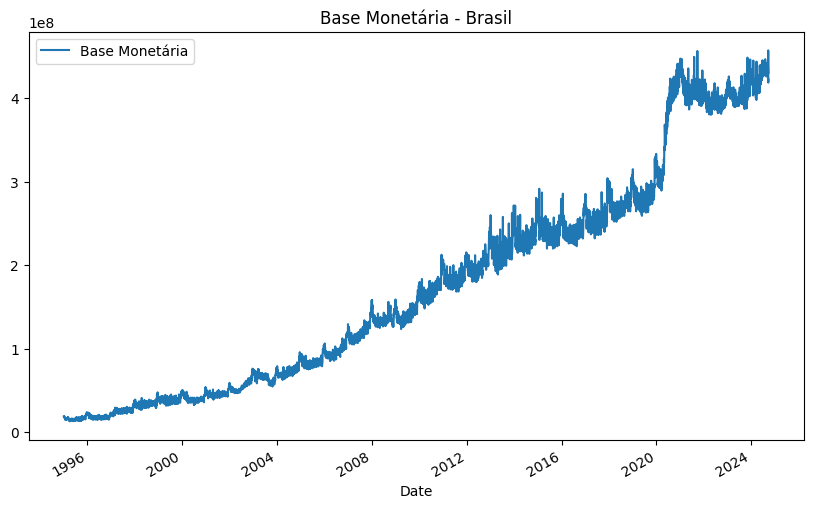

In [9]:
# Busca a série da base monetária (código 1782)
base_monetaria = sgs.get({'Base Monetária': 1782}, start='1995-01-01')

# Exibir os primeiros registros
print(base_monetaria.head())

# Exibir o gráfico da base monetária
base_monetaria.plot(title='Base Monetária - Brasil', figsize=(10,6))


Agora vamos verificar como calcular a taxa de crescimento anual da emissão de moeda no Brasil.

In [10]:
# Agora vamos codificar como calcular a taxa de crescimento anual da emissão de moeda no Brasil.

# Importar pandas
import pandas as pd

# Calcular a taxa de crescimento anual
base_monetaria['Crescimento Anual (%)'] = base_monetaria['Base Monetária'].resample('Y').last().pct_change() * 100

# Exibir as primeiras linhas
print(base_monetaria[['Crescimento Anual (%)']].dropna().head())


            Crescimento Anual (%)
Date                             
1996-12-31              -8.698135
1997-12-31              60.784094
1998-12-31              23.111629
1999-12-31              23.595574
2001-12-31              11.680017


C:\Users\danie\AppData\Local\Temp\ipykernel_22192\839369317.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  base_monetaria['Crescimento Anual (%)'] = base_monetaria['Base Monetária'].resample('Y').last().pct_change() * 100


            Crescimento Anual (%)
Date                             
1996-12-31              -8.698135
1997-12-31              60.784094
1998-12-31              23.111629
1999-12-31              23.595574
2001-12-31              11.680017
Média Geral da Taxa de Crescimento Anual: 14.20%
Média de 2000 em diante: 11.58%
Média de 2016 em diante: 9.43%


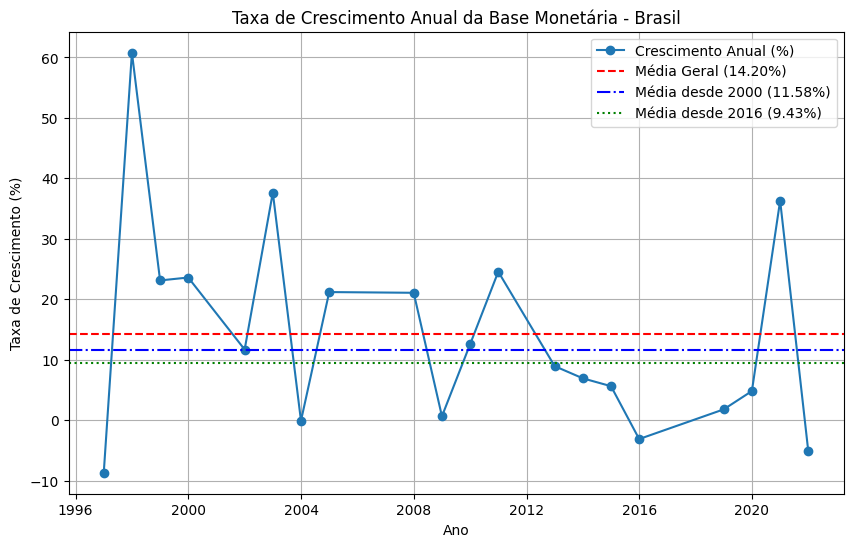

In [13]:
import matplotlib.pyplot as plt

# Calcular a média geral
media_geral = crescimento_anual.mean()

# Calcular a média de 2000 em diante
media_2000 = crescimento_anual.loc['2000-01-01':].mean()

# Calcular a média de 2016 em diante
media_2016 = crescimento_anual.loc['2016-01-01':].mean()

# Verificar se os dados estão corretos
print(base_monetaria[['Crescimento Anual (%)']].dropna().head())
print(f"Média Geral da Taxa de Crescimento Anual: {media_geral:.2f}%")
print(f"Média de 2000 em diante: {media_2000:.2f}%")
print(f"Média de 2016 em diante: {media_2016:.2f}%")

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(crescimento_anual.index, crescimento_anual, label='Crescimento Anual (%)', marker='o')

# Adicionar linha horizontal com a média geral
plt.axhline(y=media_geral, color='red', linestyle='--', label=f'Média Geral ({media_geral:.2f}%)')

# Adicionar linha horizontal com a média de 2000 em diante
plt.axhline(y=media_2000, color='blue', linestyle='-.', label=f'Média desde 2000 ({media_2000:.2f}%)')

# Adicionar linha horizontal com a média de 2016 em diante
plt.axhline(y=media_2016, color='green', linestyle=':', label=f'Média desde 2016 ({media_2016:.2f}%)')

# Adicionar título e rótulos
plt.title('Taxa de Crescimento Anual da Base Monetária - Brasil')
plt.xlabel('Ano')
plt.ylabel('Taxa de Crescimento (%)')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()


Vamos verificar o M1, que representa a quantidade de dinheiro em circulação e os depósitos à vista.

Média Geral do Crescimento Anual do M1: 19.58%
Média do Crescimento Anual do M1 desde 2000: 9.07%
Média do Crescimento Anual do M1 desde 2016: 15.81%


C:\Users\danie\AppData\Local\Temp\ipykernel_22192\3296339816.py:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  m1_anual = m1.resample('Y').last().pct_change() * 100
C:\Users\danie\AppData\Local\Temp\ipykernel_22192\3296339816.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  media_geral = m1_anual.mean()[0]
C:\Users\danie\AppData\Local\Temp\ipykernel_22192\3296339816.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  media_2000 = m1_anual.loc['2000-01-01':].mean()[0]
C:\Users\danie\AppData\Local\Temp\ipykernel_22192\3296339816.py:27: FutureWarning: Series

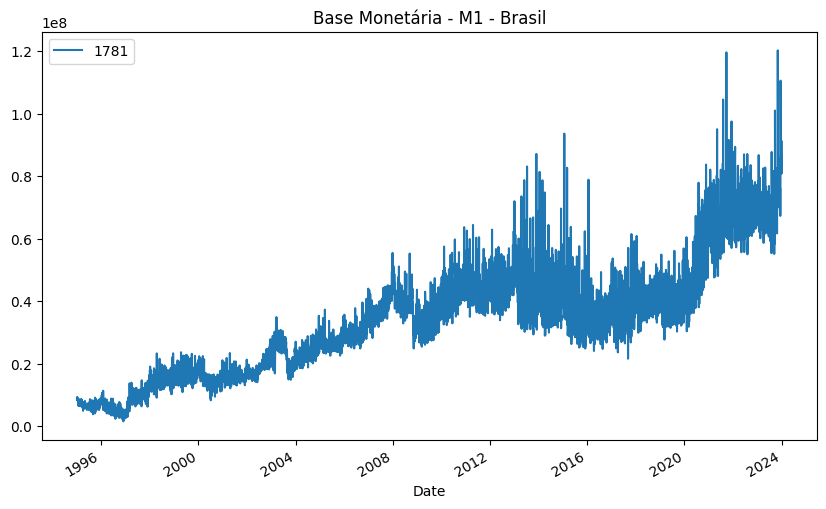

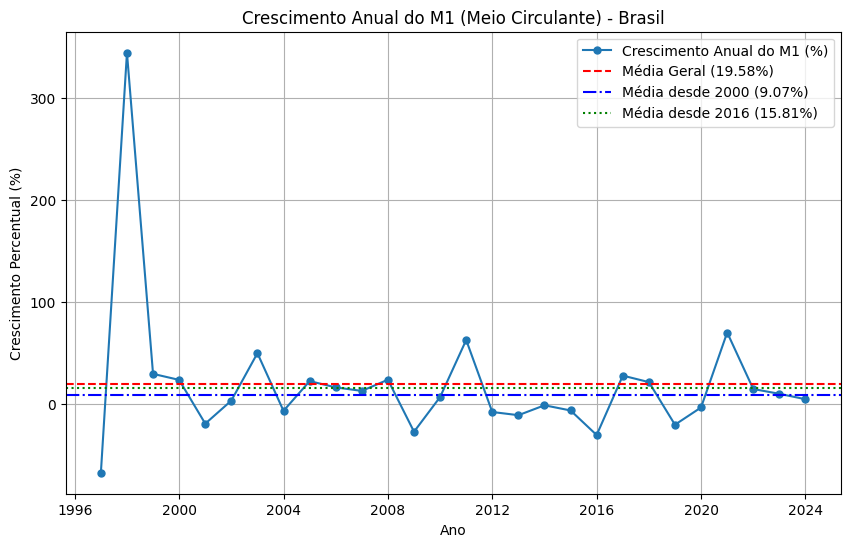

In [29]:
from bcb import sgs
import matplotlib.pyplot as plt

# Código do M1 (Meio Circulante) no Banco Central é 1781
m1 = sgs.get(1781, start='1995-01-01', end='2023-12-31')

# Remover valores NaN (caso existam)
m1 = m1.dropna()


# Exibir o gráfico da base monetária
m1.plot(title='Base Monetária - M1 - Brasil', figsize=(10,6))

# Calcular o crescimento anual do M1 (variação percentual de um ano para o outro)
m1_anual = m1.resample('Y').last().pct_change() * 100

# Remover valores NaN
m1_anual = m1_anual.dropna()

# Calcular a média geral do crescimento anual do M1
media_geral = m1_anual.mean()[0]

# Calcular a média do crescimento anual do M1 desde 2000
media_2000 = m1_anual.loc['2000-01-01':].mean()[0]

# Calcular a média do crescimento anual do M1 desde 2016
media_2016 = m1_anual.loc['2016-01-01':].mean()[0]

# Verificar as médias
print(f"Média Geral do Crescimento Anual do M1: {media_geral:.2f}%")
print(f"Média do Crescimento Anual do M1 desde 2000: {media_2000:.2f}%")
print(f"Média do Crescimento Anual do M1 desde 2016: {media_2016:.2f}%")

# Plotar o gráfico do crescimento anual do M1
plt.figure(figsize=(10, 6))
plt.plot(m1_anual.index, m1_anual, label='Crescimento Anual do M1 (%)', marker='o', markersize=5)

# Adicionar linha horizontal com a média geral
plt.axhline(y=media_geral, color='red', linestyle='--', label=f'Média Geral ({media_geral:.2f}%)')

# Adicionar linha horizontal com a média de 2000 em diante
plt.axhline(y=media_2000, color='blue', linestyle='-.', label=f'Média desde 2000 ({media_2000:.2f}%)')

# Adicionar linha horizontal com a média de 2016 em diante
plt.axhline(y=media_2016, color='green', linestyle=':', label=f'Média desde 2016 ({media_2016:.2f}%)')

# Adicionar título e rótulos
plt.title('Crescimento Anual do M1 (Meio Circulante) - Brasil')
plt.xlabel('Ano')
plt.ylabel('Crescimento Percentual (%)')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()


### Análise da Selic

Definição da SELIC: A taxa SELIC é a taxa básica de juros da economia brasileira. A SELIC é a taxa média ajustada dos financiamentos diários apurados no Sistema Especial de Liquidação e de Custodia (SELIC) para títulos federais.

Em outras palavras, a SELIC serve como referência para a economia brasileira. A SELIC é utilizada como referência para a taxa de juros de diversos produtos financeiros, como CDB, LCI, LCA, poupança, entre outros. 

A SELIC é definida pelo Comitê de Política Monetária (COPOM) do Banco Central do Brasil (BACEN). O COPOM se reúne a cada 45 dias para definir a SELIC. E as instituições financeiras utilizam a SELIC como referência para definir a taxa de juros de seus produtos financeiros.

Em termos práticos, a SELIC é utilizada para controlar a inflação. Se a inflação está subindo, o COPOM aumenta a SELIC para reduzir o consumo e controlar a inflação. Se a inflação está caindo, o COPOM reduz a SELIC para estimular o consumo e a economia.

Média Geral da Taxa Selic: 12.76%
Média da Taxa Selic desde 2000: 12.35%
Média da Taxa Selic desde 2016: 8.78%


C:\Users\danie\AppData\Local\Temp\ipykernel_22192\1835427082.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Média Geral da Taxa Selic: {media_geral[0]:.2f}%")
C:\Users\danie\AppData\Local\Temp\ipykernel_22192\1835427082.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Média da Taxa Selic desde 2000: {media_2000[0]:.2f}%")
C:\Users\danie\AppData\Local\Temp\ipykernel_22192\1835427082.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posi

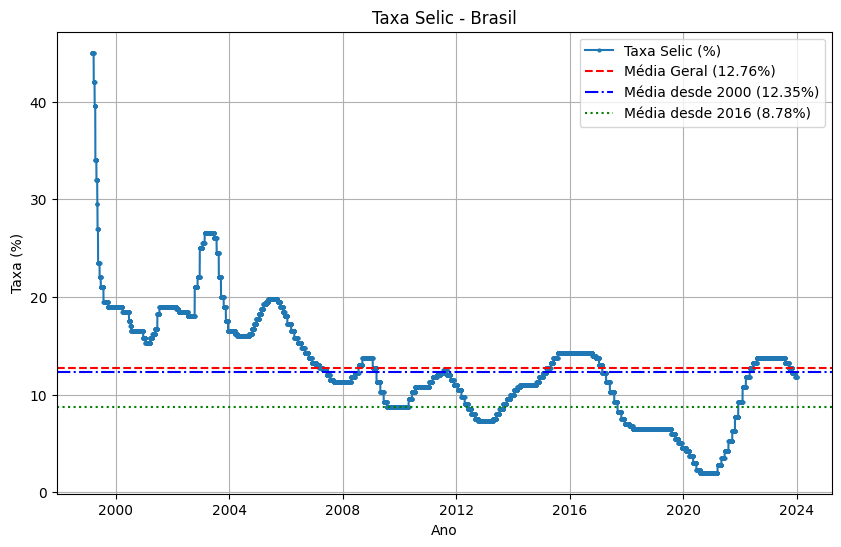

In [19]:
from bcb import sgs
import matplotlib.pyplot as plt

# Código da Taxa Selic Over é 432
selic = sgs.get(432, start='1995-01-01', end='2023-12-31')

# Remover valores NaN (caso existam)
selic = selic.dropna()

# Calcular a média geral
media_geral = selic.mean()

# Calcular a média de 2000 em diante
media_2000 = selic.loc['2000-01-01':].mean()

# Calcular a média de 2016 em diante
media_2016 = selic.loc['2016-01-01':].mean()

# Verificar as médias
print(f"Média Geral da Taxa Selic: {media_geral[0]:.2f}%")
print(f"Média da Taxa Selic desde 2000: {media_2000[0]:.2f}%")
print(f"Média da Taxa Selic desde 2016: {media_2016[0]:.2f}%")

# Plotar o gráfico da Taxa Selic com bolinhas ainda menores
plt.figure(figsize=(10, 6))
plt.plot(selic.index, selic, label='Taxa Selic (%)', marker='o', markersize=2)  # Bolinhas menores (tamanho 2)

# Adicionar linha horizontal com a média geral
plt.axhline(y=media_geral[0], color='red', linestyle='--', label=f'Média Geral ({media_geral[0]:.2f}%)')

# Adicionar linha horizontal com a média de 2000 em diante
plt.axhline(y=media_2000[0], color='blue', linestyle='-.', label=f'Média desde 2000 ({media_2000[0]:.2f}%)')

# Adicionar linha horizontal com a média de 2016 em diante
plt.axhline(y=media_2016[0], color='green', linestyle=':', label=f'Média desde 2016 ({media_2016[0]:.2f}%)')

# Adicionar título e rótulos
plt.title('Taxa Selic - Brasil')
plt.xlabel('Ano')
plt.ylabel('Taxa (%)')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()



### Análise do IPCA

Definição do IPCA: O Índice de Preços ao Consumidor Amplo (IPCA) é o índice oficial de inflação do Brasil. O IPCA é calculado pelo Instituto Brasileiro de Geografia e Estatística (IBGE) e mede a variação dos preços de uma cesta de produtos e serviços consumidos pelas famílias brasileiras.

O IPCA é utilizado como referência para a meta de inflação do Banco Central do Brasil (BACEN). A meta de inflação é definida pelo Conselho Monetário Nacional (CMN) e tem como objetivo controlar a inflação e manter a estabilidade econômica.



C:\Users\danie\AppData\Local\Temp\ipykernel_22192\1251510918.py:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ipca_anual = ipca_acumulado.resample('Y').last().pct_change() * 100
C:\Users\danie\AppData\Local\Temp\ipykernel_22192\1251510918.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  media_geral = ipca_anual.mean()[0]  # Acessar o valor escalar
C:\Users\danie\AppData\Local\Temp\ipykernel_22192\1251510918.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  media_2000 = ipca_anual.loc['2000-01-01':].mean()[0]
C:\Users\danie\AppData\Local\Temp\ipykernel_

Média Geral do Aumento Anual da Inflação: 12.63%
Média do Aumento Anual da Inflação desde 2000: 10.24%
Média do Aumento Anual da Inflação desde 2016: 6.54%


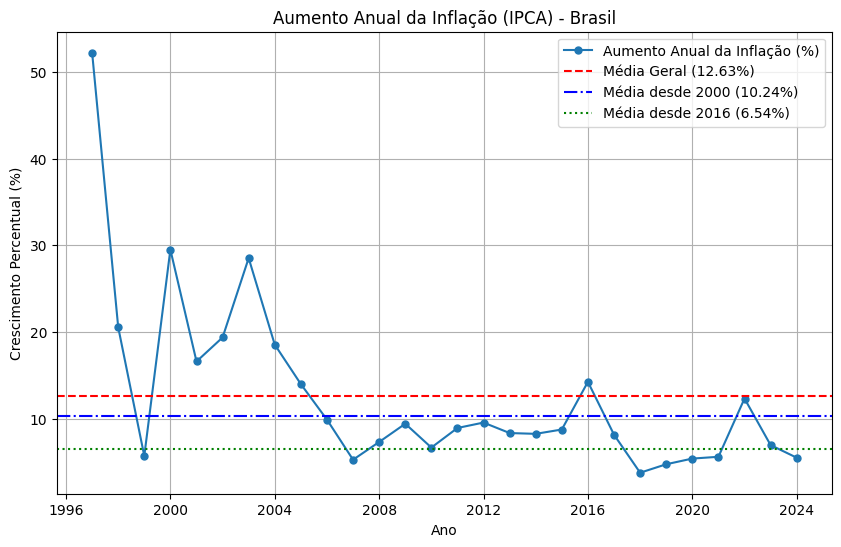

In [25]:
from bcb import sgs
import matplotlib.pyplot as plt

# Código do IPCA é 433
ipca = sgs.get(433, start='1995-01-01', end='2023-12-31')

# Remover valores NaN (caso existam)
ipca = ipca.dropna()

# Calcular o IPCA acumulado
ipca_acumulado = (1 + ipca / 100).cumprod() - 1
ipca_acumulado *= 100  # Converter para percentual

# Calcular o aumento anual da inflação (variação percentual do IPCA de um ano para o outro)
ipca_anual = ipca_acumulado.resample('Y').last().pct_change() * 100

# Remover valores NaN
ipca_anual = ipca_anual.dropna()

# Calcular a média geral do aumento anual da inflação
media_geral = ipca_anual.mean()[0]  # Acessar o valor escalar

# Calcular a média do aumento anual da inflação desde 2000
media_2000 = ipca_anual.loc['2000-01-01':].mean()[0]

# Calcular a média do aumento anual da inflação desde 2016
media_2016 = ipca_anual.loc['2016-01-01':].mean()[0]

# Verificar as médias
print(f"Média Geral do Aumento Anual da Inflação: {media_geral:.2f}%")
print(f"Média do Aumento Anual da Inflação desde 2000: {media_2000:.2f}%")
print(f"Média do Aumento Anual da Inflação desde 2016: {media_2016:.2f}%")

# Plotar o gráfico do aumento anual da inflação
plt.figure(figsize=(10, 6))
plt.plot(ipca_anual.index, ipca_anual, label='Aumento Anual da Inflação (%)', marker='o', markersize=5)

# Adicionar linha horizontal com a média geral
plt.axhline(y=media_geral, color='red', linestyle='--', label=f'Média Geral ({media_geral:.2f}%)')

# Adicionar linha horizontal com a média de 2000 em diante
plt.axhline(y=media_2000, color='blue', linestyle='-.', label=f'Média desde 2000 ({media_2000:.2f}%)')

# Adicionar linha horizontal com a média de 2016 em diante
plt.axhline(y=media_2016, color='green', linestyle=':', label=f'Média desde 2016 ({media_2016:.2f}%)')

# Adicionar título e rótulos
plt.title('Aumento Anual da Inflação (IPCA) - Brasil')
plt.xlabel('Ano')
plt.ylabel('Crescimento Percentual (%)')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()


### Taxa de Câmbio

Definição de **Taxa de cambio nominal**: A taxa de câmbio nominal é o preço de uma moeda estrangeira em termos da moeda nacional. A taxa de câmbio nominal é o preço de uma moeda estrangeira em termos da moeda nacional. Por exemplo, se a taxa de câmbio nominal do dólar é de R$ 5,00, isso significa que um dólar custa R$ 5,00.


C:\Users\danie\AppData\Local\Temp\ipykernel_22192\1790594337.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  cambio_anual = cambio.resample('Y').last().pct_change() * 100
C:\Users\danie\AppData\Local\Temp\ipykernel_22192\1790594337.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  media_geral = cambio_anual.mean()[0]
C:\Users\danie\AppData\Local\Temp\ipykernel_22192\1790594337.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  media_2000 = cambio_anual.loc['2000-01-01':].mean()[0]
C:\Users\danie\AppData\Local\Temp\ipykernel_22192\1790594337.py:23: Futur

Média Geral do Aumento Anual da Taxa de Câmbio: 7.65%
Média do Aumento Anual da Taxa de Câmbio desde 2000: 5.99%
Média do Aumento Anual da Taxa de Câmbio desde 2016: 3.59%


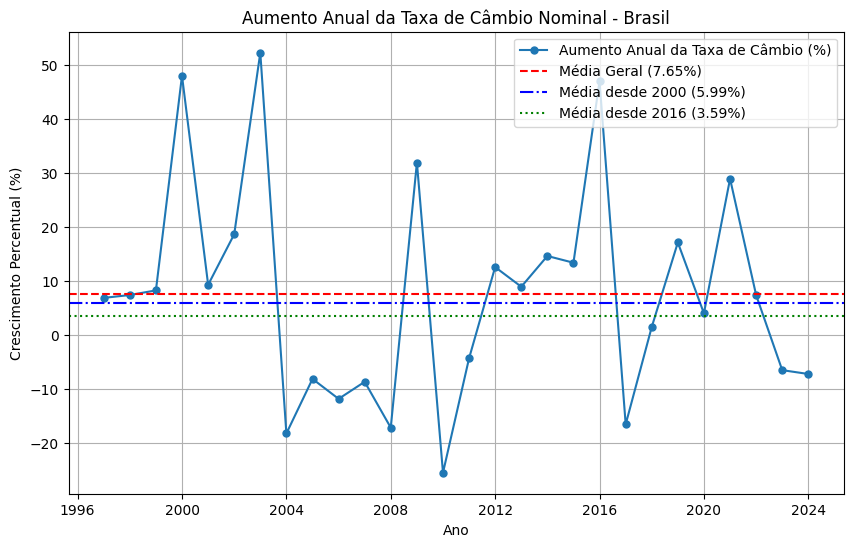

In [26]:
from bcb import sgs
import matplotlib.pyplot as plt

# Código da Taxa de Câmbio Nominal (Venda) é 1
cambio = sgs.get(1, start='1995-01-01', end='2023-12-31')

# Remover valores NaN (caso existam)
cambio = cambio.dropna()

# Calcular o aumento anual da taxa de câmbio (variação percentual da taxa de câmbio de um ano para o outro)
cambio_anual = cambio.resample('Y').last().pct_change() * 100

# Remover valores NaN
cambio_anual = cambio_anual.dropna()

# Calcular a média geral do aumento anual da taxa de câmbio
media_geral = cambio_anual.mean()[0]

# Calcular a média do aumento anual da taxa de câmbio desde 2000
media_2000 = cambio_anual.loc['2000-01-01':].mean()[0]

# Calcular a média do aumento anual da taxa de câmbio desde 2016
media_2016 = cambio_anual.loc['2016-01-01':].mean()[0]

# Verificar as médias
print(f"Média Geral do Aumento Anual da Taxa de Câmbio: {media_geral:.2f}%")
print(f"Média do Aumento Anual da Taxa de Câmbio desde 2000: {media_2000:.2f}%")
print(f"Média do Aumento Anual da Taxa de Câmbio desde 2016: {media_2016:.2f}%")

# Plotar o gráfico do aumento anual da taxa de câmbio
plt.figure(figsize=(10, 6))
plt.plot(cambio_anual.index, cambio_anual, label='Aumento Anual da Taxa de Câmbio (%)', marker='o', markersize=5)

# Adicionar linha horizontal com a média geral
plt.axhline(y=media_geral, color='red', linestyle='--', label=f'Média Geral ({media_geral:.2f}%)')

# Adicionar linha horizontal com a média de 2000 em diante
plt.axhline(y=media_2000, color='blue', linestyle='-.', label=f'Média desde 2000 ({media_2000:.2f}%)')

# Adicionar linha horizontal com a média de 2016 em diante
plt.axhline(y=media_2016, color='green', linestyle=':', label=f'Média desde 2016 ({media_2016:.2f}%)')

# Adicionar título e rótulos
plt.title('Aumento Anual da Taxa de Câmbio Nominal - Brasil')
plt.xlabel('Ano')
plt.ylabel('Crescimento Percentual (%)')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()


Definição de **Taxa de cambio real**: A taxa de câmbio real é o preço de uma cesta de bens e serviços em termos da moeda nacional. A taxa de câmbio real é o preço de uma cesta de bens e serviços em termos da moeda nacional. Por exemplo, se a taxa de câmbio real do dólar é de R$ 5,00, isso significa que uma cesta de bens e serviços custa R$ 5,00.

Em termos de equação, a taxa de câmbio real é calculada pela seguinte fórmula:

$$
\text{Taxa de câmbio real} = \frac{\text{Taxa de câmbio nominal} \times \text{Índice de preços no Brasil}}{\text{Índice de preços no exterior}}
$$


C:\Users\danie\AppData\Local\Temp\ipykernel_22192\1902368354.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  cambio_real_anual = cambio_real.resample('Y').last().pct_change() * 100
C:\Users\danie\AppData\Local\Temp\ipykernel_22192\1902368354.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  media_geral = cambio_real_anual.mean()[0]
C:\Users\danie\AppData\Local\Temp\ipykernel_22192\1902368354.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  media_2000 = cambio_real_anual.loc['2000-01-01':].mean()[0]
C:\Users\danie\AppData\Local\Temp\ipykernel_22192\190

Média Geral do Aumento Anual da Taxa de Câmbio Real: 7.66%
Média do Aumento Anual da Taxa de Câmbio Real desde 2000: 5.99%
Média do Aumento Anual da Taxa de Câmbio Real desde 2016: 3.59%


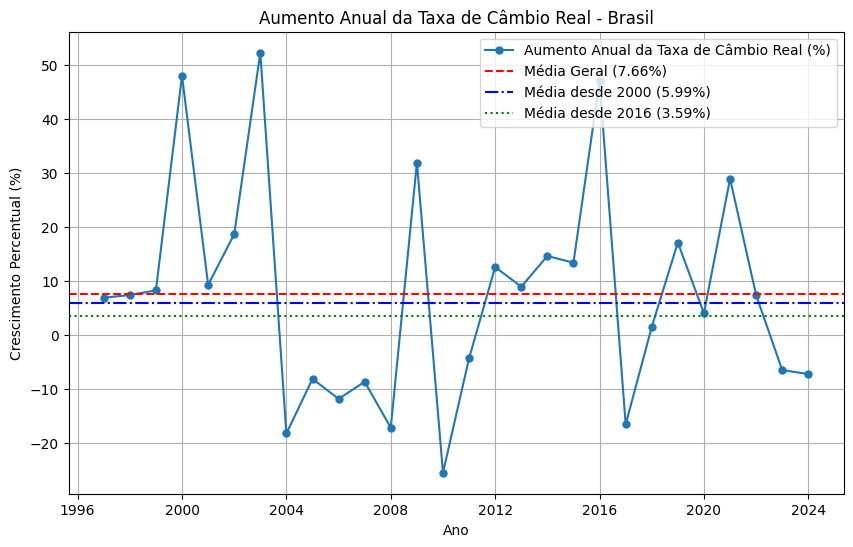

In [27]:
from bcb import sgs
import matplotlib.pyplot as plt

# Código da Taxa de Câmbio Real (Eficaz) é 10813
cambio_real = sgs.get(10813, start='1995-01-01', end='2023-12-31')

# Remover valores NaN (caso existam)
cambio_real = cambio_real.dropna()

# Calcular o aumento anual da taxa de câmbio real (variação percentual de um ano para o outro)
cambio_real_anual = cambio_real.resample('Y').last().pct_change() * 100

# Remover valores NaN
cambio_real_anual = cambio_real_anual.dropna()

# Calcular a média geral do aumento anual da taxa de câmbio real
media_geral = cambio_real_anual.mean()[0]

# Calcular a média do aumento anual da taxa de câmbio real desde 2000
media_2000 = cambio_real_anual.loc['2000-01-01':].mean()[0]

# Calcular a média do aumento anual da taxa de câmbio real desde 2016
media_2016 = cambio_real_anual.loc['2016-01-01':].mean()[0]

# Verificar as médias
print(f"Média Geral do Aumento Anual da Taxa de Câmbio Real: {media_geral:.2f}%")
print(f"Média do Aumento Anual da Taxa de Câmbio Real desde 2000: {media_2000:.2f}%")
print(f"Média do Aumento Anual da Taxa de Câmbio Real desde 2016: {media_2016:.2f}%")

# Plotar o gráfico do aumento anual da taxa de câmbio real
plt.figure(figsize=(10, 6))
plt.plot(cambio_real_anual.index, cambio_real_anual, label='Aumento Anual da Taxa de Câmbio Real (%)', marker='o', markersize=5)

# Adicionar linha horizontal com a média geral
plt.axhline(y=media_geral, color='red', linestyle='--', label=f'Média Geral ({media_geral:.2f}%)')

# Adicionar linha horizontal com a média de 2000 em diante
plt.axhline(y=media_2000, color='blue', linestyle='-.', label=f'Média desde 2000 ({media_2000:.2f}%)')

# Adicionar linha horizontal com a média de 2016 em diante
plt.axhline(y=media_2016, color='green', linestyle=':', label=f'Média desde 2016 ({media_2016:.2f}%)')

# Adicionar título e rótulos
plt.title('Aumento Anual da Taxa de Câmbio Real - Brasil')
plt.xlabel('Ano')
plt.ylabel('Crescimento Percentual (%)')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()


Você pode realizar análises parecidas para as demais séries temporais disponíveis no pacote python-bcb.

1. Inflação e Índices de Preços
* IPCA (Código 433): Índice de Preços ao Consumidor Amplo, principal medida de inflação no Brasil.
* INPC (Código 188): Índice Nacional de Preços ao Consumidor.
* IGP-M (Código 189): Índice Geral de Preços do Mercado.
* IPCA-15 (Código 13522): Índice de Preços ao Consumidor Amplo - 15 dias.

2. Agregados Monetários
* M1 (Código 1781): Meio circulante, que inclui papel-moeda e depósitos à vista.
* M2 (Código 1782): Inclui M1 mais depósitos de poupança e depósitos a prazo.
* M3 (Código 1783): M2 mais quotas de fundos de renda fixa.
* M4 (Código 2784): M3 mais títulos públicos e privados de médio e longo prazo.

3. Taxas de Câmbio
* Taxa de Câmbio Nominal - Dólar (Código 1): Taxa de venda do dólar.
* Taxa de Câmbio Efetiva Real (Código 10813): Taxa ponderada com base no comércio exterior.

4. Taxas de Juros
* Selic Over (Código 432): Taxa básica de juros do Brasil.
* Taxa DI (Código 12): Taxa de Depósito Interbancário.
* Taxas de Juros para Títulos Públicos (Código 11): LTN e outros.

5. Atividade Econômica
* IBC-Br (Código 24364): Índice de Atividade Econômica do Banco Central, uma proxy para o PIB.
* Produção Industrial (Código 10784): Dados da produção industrial.

6. Crédito
* Saldo das Operações de Crédito (Código 21084): Total de operações de crédito no sistema financeiro.
* Inadimplência (Código 20786): Taxa de inadimplência para crédito de pessoa física.

7. Setor Externo
* Exportações FOB (Código 226): Valor das exportações brasileiras.
* Importações FOB (Código 227): Valor das importações brasileiras.

8. Dívida e Política Fiscal
* Dívida Bruta do Governo (Código 4509): Indicador de endividamento público.
* Superávit Primário (Código 3666): Indicador das contas públicas.


Essas são algumas das séries mais utilizadas. O pacote bcb permite buscar essas e muitas outras séries temporais através de seu código específico, que pode ser encontrado no próprio site do Banco Central ou através do Sistema Gerenciador de Séries Temporais (SGS).

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

In [3]:
# DataFrame
df = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/cattaneo2.dta")

# Criar a variável de resultado
df['Y'] = df['bweight']

# Criar a variável 'Treated' com valor 1 se 'mbsmoke' for 'smoker', caso contrário 0
df['D'] = np.where(df['mbsmoke'] == 'smoker', 1, 0)

# Criar a variável 'casada' com valor 1 se 'mmarried' for 'married', caso contrário 0
df['casada'] = np.where(df['mmarried'] == 'married', 1, 0)

In [4]:
import pandas as pd
from econml.dml import LinearDML
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# Definir as variáveis
X = df[['casada', 'mage', 'medu', 'fhisp', 'mhisp', 'foreign', 'alcohol', 'deadkids', 'nprenatal', 'mrace', 'frace', 'fage', 'fedu']]
D = df['D']
y = df['Y']

# Converter variáveis categóricas em dummies (se necessário)
X = pd.get_dummies(X, drop_first=True)

# Definir os modelos de Machine Learning para (i) X em Y, e (ii) X em D
model_y = GradientBoostingRegressor(n_estimators=100, random_state=123)
model_d = GradientBoostingClassifier(n_estimators=100, random_state=123)

# Criar o estimador LinearDML
estimator = LinearDML(model_y=model_y,
                      model_t=model_d,
                      discrete_treatment=True,
                      cv=10,
                      random_state=123)

# Ajustar o modelo
estimator.fit(y, D, X=X)

ate_inf = estimator.ate_inference(X=X)
print(ate_inf.summary())

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
  -210.026      26.169 -8.026    0.0      -261.315      -158.736
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
  120.872        -397.661         131.258
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
     123.672       -450.408        161.909
------------------------------------------


In [5]:
print(estimator.summary())

                      Coefficient Results                       
          point_estimate  stderr zstat  pvalue ci_lower ci_upper
----------------------------------------------------------------
casada            28.828  55.792  0.517  0.605  -80.522  138.178
mage             -11.333   5.261 -2.154  0.031  -21.644   -1.022
medu              17.987  11.957  1.504  0.133   -5.449   41.422
fhisp             66.089 130.914  0.505  0.614 -190.497  322.676
mhisp            -85.452 161.644 -0.529  0.597 -402.269  231.364
foreign           348.68 153.471  2.272  0.023   47.882  649.478
alcohol          -30.274  91.655  -0.33  0.741 -209.915  149.368
deadkids          37.647  51.511  0.731  0.465  -63.312  138.606
nprenatal        -14.287   6.922 -2.064  0.039  -27.853   -0.721
mrace           -144.841 102.649 -1.411  0.158 -346.029   56.347
frace             48.413  99.684  0.486  0.627 -146.964  243.791
fage              -0.022   2.781 -0.008  0.994   -5.472    5.427
fedu              -0.491 

In [6]:
X_new = pd.DataFrame({
    'casada': [1],
    'mage': [25],
    'medu': [12],
    'fhisp': [0],
    'mhisp': [0],
    'foreign': [0],
    'alcohol': [1],
    'deadkids': [0],
    'nprenatal': [10],
    'mrace': [1],
    'frace': [1],
    'fage': [30],
    'fedu': [10]
})

# Certificar-se de que as colunas correspondem às usadas no modelo
X_new = pd.get_dummies(X_new, drop_first=True)

# Calcular o efeito e obter a inferência
effect_inf = estimator.effect_inference(X_new)
print(effect_inf.summary_frame())

   point_estimate  stderr  zstat  pvalue  ci_lower  ci_upper
X                                                           
0        -256.114  95.479 -2.682   0.007  -443.249    -68.98


In [7]:
from econml.dml import CausalForestDML
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Criar o estimador ForestDML
estimator_Forest = CausalForestDML(
    model_y=RandomForestRegressor(n_estimators=100, random_state=123),
    model_t=RandomForestClassifier(n_estimators=100, random_state=123),
    discrete_treatment=True,
    random_state=123
)

# Ajustar o modelo
estimator_Forest.fit(y, D, X=X)

# Obter a inferência do ATE
ate_inf_forest = estimator_Forest.ate_inference(X=X)

# Exibir o resumo da inferência
print(ate_inf_forest.summary())

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
  -214.954     186.112 -1.155  0.248      -579.728       149.819
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
  143.065         -494.49          58.236
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
     234.746       -702.526        231.413
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


In [8]:
# Definir as características específicas
X_new = pd.DataFrame({
    'casada': [1],
    'mage': [25],
    'medu': [12],
    'fhisp': [0],
    'mhisp': [0],
    'foreign': [0],
    'alcohol': [1],
    'deadkids': [0],
    'nprenatal': [10],
    'mrace': [1],
    'frace': [1],
    'fage': [30],
    'fedu': [10]
})

# Converter variáveis categóricas em dummies, se aplicável
X_new = pd.get_dummies(X_new, drop_first=True)

# Calcular a estimativa pontual do efeito
cate_new = estimator_Forest.effect(X_new)

# Obter a inferência estatística
effect_inf = estimator_Forest.effect_inference(X_new)

# Exibir o resumo da inferência
print(effect_inf.summary_frame())

   point_estimate  stderr  zstat  pvalue  ci_lower  ci_upper
X                                                           
0        -192.011  94.156 -2.039   0.041  -376.554    -7.468


In [ ]:
from econml.dml import NonParamDML
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor

# Create the NonParamDML estimator
estimator_NonParam = NonParamDML(
    model_y=RandomForestRegressor(n_estimators=100, random_state=123),
    model_t=RandomForestClassifier(n_estimators=100, random_state=123),
    model_final=GradientBoostingRegressor(n_estimators=100, random_state=123),
    discrete_treatment=True,
    random_state=123
)

# Ajustar o modelo com inferência por bootstrap
estimator_NonParam.fit(y, D, X=X, inference='bootstrap')

# Obter a inferência do ATE
ate_inf = estimator_NonParam.ate_inference(X=X)

# Exibir o resumo da inferência
print(ate_inf.summary())

In [ ]:
# Obter as estimativas pontuais do CATE em X
cates = estimator_NonParam.effect(X)
cate_inf = estimator_NonParam.effect_inference(X)
# Obter o resumo das estimativas do CATE
print(cate_inf.summary_frame().head())

In [ ]:
# Definir as características específicas
X_new = pd.DataFrame({
    'casada': [1],
    'mage': [25],
    'medu': [12],
    'fhisp': [0],
    'mhisp': [0],
    'foreign': [0],
    'alcohol': [1],
    'deadkids': [0],
    'nprenatal': [10],
    'mrace': [1],
    'frace': [1],
    'fage': [30],
    'fedu': [10]
})

# Converter variáveis categóricas em dummies, se aplicável
X_new = pd.get_dummies(X_new, drop_first=True)

# Calcular a estimativa pontual do efeito
cate_new = estimator_NonParam.effect(X_new)

# Obter a inferência estatística
effect_inf = estimator_NonParam.effect_inference(X_new)

# Exibir o resumo da inferência
print(effect_inf.summary_frame())

In [1]:
from econml.panel.dml import DynamicDML
est = DynamicDML()
est.fit(y_dyn, T_dyn, X=X_dyn, W=W_dyn, groups=groups)

NameError: name 'y_dyn' is not defined

In [2]:
from econml.panel.dml import DynamicDML
est = DynamicDML()
est.fit(y_dyn, T_dyn, X=X_dyn, W=W_dyn, groups=groups)

NameError: name 'y_dyn' is not defined

In [3]:
import numpy as np
import pandas as pd
from econml.panel.dml import DynamicDML
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Gerando dados simulados para um painel
np.random.seed(42)

n_individuals = 500  # Número de indivíduos
n_periods = 10       # Número de períodos de tempo

# Criando IDs e períodos
individuals = np.repeat(np.arange(n_individuals), n_periods)
time_periods = np.tile(np.arange(n_periods), n_individuals)

# Variáveis exógenas (features)
X = np.random.normal(size=(n_individuals * n_periods, 2))  # Duas variáveis independentes
W = np.random.normal(size=(n_individuals * n_periods, 1))  # Uma variável de controle

# Tratamento: binário e dinâmico ao longo do tempo
T = np.random.binomial(1, 0.3, size=(n_individuals * n_periods))

# Criando efeito dinâmico do tratamento (por exemplo, atraso de um período)
T_lag = np.roll(T, 1)  # Deslocando o tratamento para simular o efeito do passado
T_lag[time_periods == 0] = 0  # Ajustando para o primeiro período não ter passado

# Outcome (variável dependente) com efeito do tratamento e um efeito de tempo
y = 2 * T + 0.5 * T_lag + X[:, 0] + W[:, 0] + np.random.normal(size=n_individuals * n_periods)

# Criando DataFrame para facilitar a manipulação
df = pd.DataFrame({
    'id': individuals,
    'time': time_periods,
    'y': y,
    'T': T,
    'X1': X[:, 0],
    'X2': X[:, 1],
    'W': W[:, 0]
})

# Separando variáveis para o modelo
y_dyn = df['y']
T_dyn = df['T']
X_dyn = df[['X1', 'X2']]
W_dyn = df[['W']]
groups = df['id']  # ID dos indivíduos para estruturar o painel

# Criando o modelo DynamicDML
est = DynamicDML(
    model_y=RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42),
    model_t=LogisticRegression(),
    featurizer=None,  # Pode ser ajustado para transformar X antes do aprendizado
    discrete_treatment=True,  # Se o tratamento for binário
    cv=5,  # Cross-validation
)

# Ajustando o modelo
est.fit(y_dyn, T_dyn, X=X_dyn, W=W_dyn, groups=groups)

# Estimando os efeitos causais dinâmicos
treatment_effects = est.effect(X_dyn)

# Exibindo os primeiros valores estimados
print("Efeitos estimados do tratamento dinâmico:")
print(treatment_effects[:10])


Efeitos estimados do tratamento dinâmico:
[2.28495174 1.97768078 2.10069961 2.39718525 1.87148183 2.08529683
 2.58712088 1.75277243 1.76753826 2.16007909]


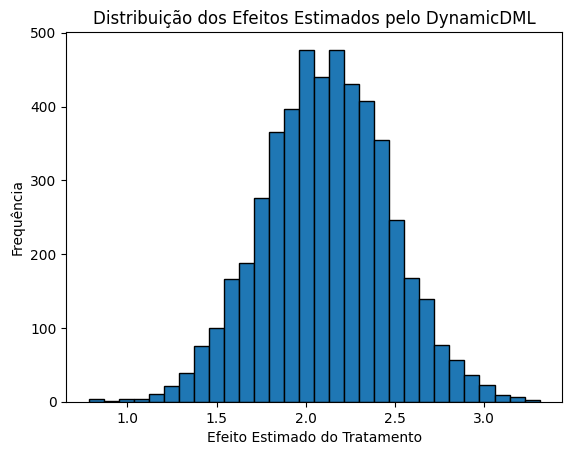

In [5]:
import matplotlib.pyplot as plt

plt.hist(treatment_effects, bins=30, edgecolor='black')
plt.xlabel("Efeito Estimado do Tratamento")
plt.ylabel("Frequência")
plt.title("Distribuição dos Efeitos Estimados pelo DynamicDML")
plt.show()


In [6]:
mean_effect = np.mean(treatment_effects)
std_effect = np.std(treatment_effects)
conf_interval = (mean_effect - 1.96 * std_effect, mean_effect + 1.96 * std_effect)

print(f"Efeito médio estimado: {mean_effect:.4f}")
print(f"Intervalo de confiança de 95%: {conf_interval}")


Efeito médio estimado: 2.1155
Intervalo de confiança de 95%: (1.4247264775268782, 2.806250139006594)


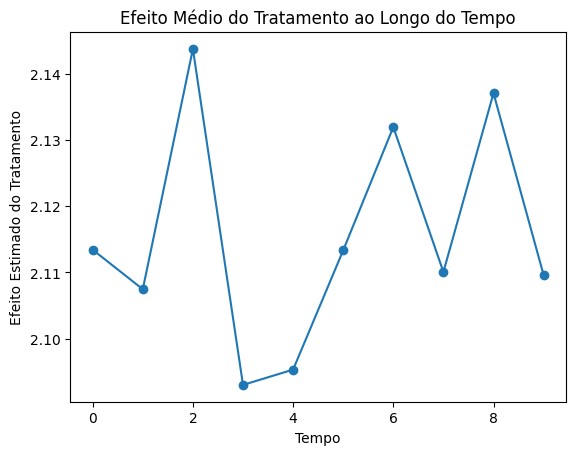

In [7]:
df["treatment_effects"] = treatment_effects
mean_effects_by_time = df.groupby("time")["treatment_effects"].mean()

plt.plot(mean_effects_by_time.index, mean_effects_by_time.values, marker="o")
plt.xlabel("Tempo")
plt.ylabel("Efeito Estimado do Tratamento")
plt.title("Efeito Médio do Tratamento ao Longo do Tempo")
plt.show()


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from econml.panel.dml import DynamicDML
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.ensemble import RandomForestRegressor

# Criando o modelo DynamicDML
est = DynamicDML(
    model_y=RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42),
    model_t=LogisticRegression(),
    featurizer=None,
    discrete_treatment=True,
    cv=5
)

# Ajustando o modelo
est.fit(y_dyn, T_dyn, X=X_dyn, W=W_dyn, groups=groups)

# Criando a sequência de períodos (lags) para o estudo de eventos
lags = np.arange(-5, 6)  # 5 períodos antes e 5 depois

# Calculando os efeitos dinâmicos para cada período
effects_by_time = []
conf_intervals = []

for lag in lags:
    effect = est.effect(X_dyn, periods=lag)  # Estimando o efeito para o período específico
    lb, ub = est.effect_interval(X_dyn, alpha=0.05, periods=lag)  # Intervalo de confiança

    effects_by_time.append(np.mean(effect))  # Média dos efeitos
    conf_intervals.append((np.mean(lb), np.mean(ub)))  # Intervalo de confiança médio

# Convertendo listas para arrays para visualização
effects_by_time = np.array(effects_by_time)
conf_intervals = np.array(conf_intervals)
lower_bounds = conf_intervals[:, 0]
upper_bounds = conf_intervals[:, 1]

# 📊 **2. Plotando os resultados no formato Event Study**
plt.figure(figsize=(8, 5))
plt.plot(lags, effects_by_time, marker='o', linestyle='-', label="Efeito Estimado")
plt.fill_between(lags, lower_bounds, upper_bounds, alpha=0.3, label="IC 95%")
plt.axvline(x=0, color='red', linestyle='--', label="Início do Tratamento")
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Períodos Relativos ao Tratamento")
plt.ylabel("Efeito Estimado")
plt.title("Event Study: Efeito do Tratamento ao Longo do Tempo")
plt.legend()
plt.show()


TypeError: TreatmentExpansionMixin.effect() got an unexpected keyword argument 'periods'

In [ ]:
import numpy as np
import doubleml as dml
from doubleml.datasets import make_did_SZ2020
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

ml_g = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_leaf=5)
ml_m = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=5)
np.random.seed(42)
data = make_did_SZ2020(n_obs=500, cross_sectional_data=True, return_type='DataFrame')
obj_dml_data = dml.DoubleMLData(data, 'y', 'd', t_col='t')
dml_did_obj = dml.DoubleMLDIDCS(obj_dml_data, ml_g, ml_m)
print(dml_did_obj.fit())

================== DoubleMLDIDCS Object ==================

------------------ Data summary      ------------------
Outcome variable: y
Treatment variable(s): ['d']
Covariates: ['Z1', 'Z2', 'Z3', 'Z4']
Instrument variable(s): None
Time variable: t
No. Observations: 500

------------------ Score & algorithm ------------------
Score function: observational

------------------ Machine learner   ------------------
Learner ml_g: RandomForestRegressor(max_depth=5, min_samples_leaf=5)
Learner ml_m: RandomForestClassifier(max_depth=5, min_samples_leaf=5)
Out-of-sample Performance:
Regression:
Learner ml_g_d0_t0 RMSE: [[17.49137024]]
Learner ml_g_d0_t1 RMSE: [[44.85397773]]
Learner ml_g_d1_t0 RMSE: [[32.74938952]]
Learner ml_g_d1_t1 RMSE: [[53.7282094]]
Classification:
Learner ml_m Log Loss: [[0.67936506]]

------------------ Resampling        ------------------
No. folds: 5
No. repeated sample splits: 1

------------------ Fit summary       ------------------
       coef   std err         t   

In [ ]:
from differences import ATTgt, simulate_data

df = simulate_data()
att_gt = ATTgt(data=df, cohort_name='cohort')
att_gt.fit(formula='y')
att_gt.aggregate('event')

Computing ATTgt [workers=1]   100%|████████████████████| 21/21 [00:00<00:00, 122.49it/s]


EventAggregation                                            \
                                  analytic pointwise conf. band              
                             ATT std_error                lower      upper   
relative_period                                                              
-6                      1.357040  1.186994            -0.969426   3.683506   
-5                      1.548037  0.802053            -0.023959   3.120032   
-4                     -0.355381  0.797768            -1.918978   1.208215   
-3                     -0.333267  0.788506            -1.878710   1.212176   
-2                      0.046092  0.747376            -1.418739   1.510922   
-1                     -0.187272  0.655549            -1.472124   1.097581   
 0                      0.813179  0.688709            -0.536667   2.163025   
 1                      5.727899  0.935702             3.893957   7.561841   
 2                     20.456553  1.319708            17.869972  23.043133   
 3                     28.748216  1.289767            26.220319  31.276114   
 4                     39.355553  1.283699            36.839549  41.871556   
 5                     50.896607  1.352490            48.245775  53.547439   

                                   
                                   
                zero_not_in_cband  
relative_period                    
-6                                 
-5                                 
-4                                 
-3                                 
-2                                 
-1                                 
 0                                 
 1                              *  
 2                              *  
 3                              *  
 4                              *  
 5                              *

In [4]:
# Tabular os dados da variável "Cohort"
df['cohort'].value_counts()

1902.0    2144
1906.0    2128
1907.0    2128
Name: cohort, dtype: int64

In [6]:
import pandas as pd
# gerar um dataframe com os valores de 'cohort' igual à 1902.0 e todos os missings junto
df_1902 = df[df['cohort'] == 1902.0]
df_missing = df[df['cohort'].isnull()]
# juntar os dois dataframes
df_1902_missing = pd.concat([df_1902, df_missing])

In [ ]:
# gerar a partir da variável index uma variável identificadora (id) e outra de tempo (time)
df_1902_missing['id'] = df_1902_missing.index
df_1902_missing['time'] = df_1902_missing.index



In [10]:
df_1902_missing = df_1902_missing.drop(columns=['time'])
df_1902_missing = df_1902_missing.drop(columns=['id'])